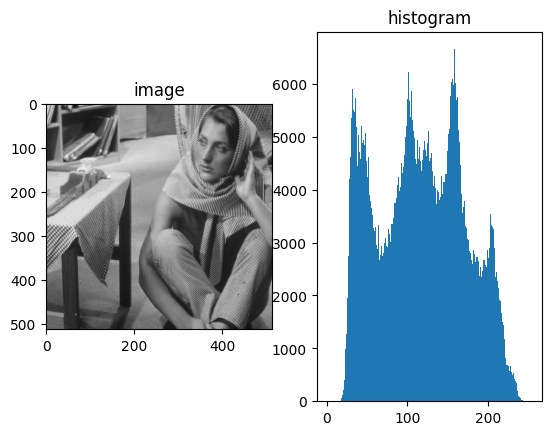

In [4]:
"""
Pour ce notebook entier, 
TP2_3 Image processing
Nathan Oliveira Da Silva ING3A
"""
# Histogramme des niveaux de gris d'images 1) CALCUL
import matplotlib.pyplot as plt
import cv2
import numpy as np


def calcul(img):
    # changement en image grise
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # premier terrain position 1
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title('image')

    # deuxieme terrain position 2
    plt.subplot(1, 2, 2)
    # chargement histogramme
    plt.hist(img.ravel(), 256, [0, 255])
    plt.title('histogram')

    plt.show()


# chargement de l'image test
img = cv2.imread('../../Images/barbara.png')
calcul(img)

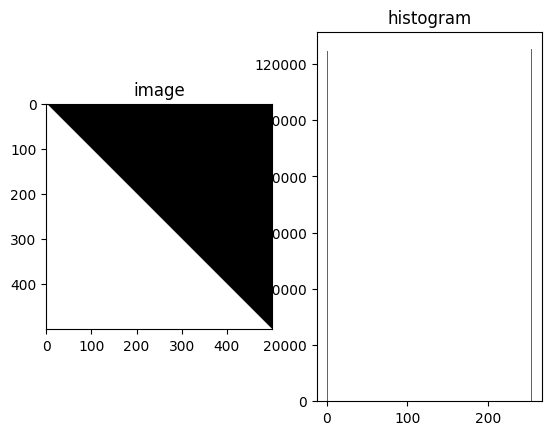

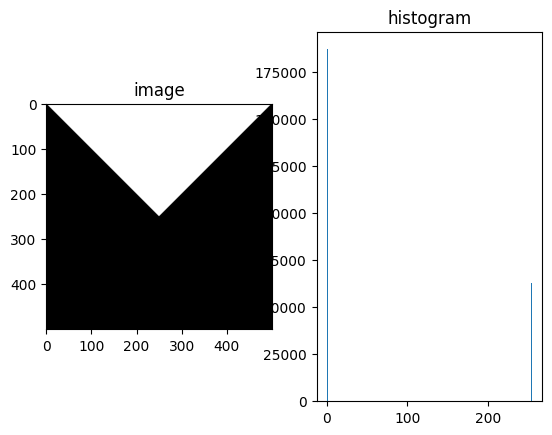

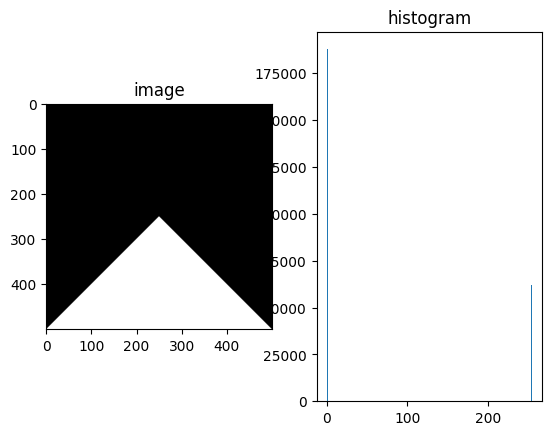

In [113]:
# Histogramme des niveaux de gris d'images et transformations 2) calcul Fig précédentes


# Fig 1
def createFig1():
    fig1 = np.zeros((500, 500))
    for i in range(len(fig1)):
        for j in range(i + 1):
            fig1[i][j] = 255

    return fig1


calcul(createFig1())


# Fig 2a
def createFig2a():
    # triangle blanc coin haut droite
    temp1 = np.zeros((250, 250))
    temp1.fill(255)
    for i in range(len(temp1)):
        for j in range(i):
            temp1[i][j] = 0

    # triangle blanc coin haut gauche
    temp2 = np.zeros((250, 250))
    temp2.fill(255)
    for i in range(len(temp2)):
        for j in range(i):
            temp2[i, len(temp2) - j - 1] = 0

    # rectangle base noire
    temp3 = np.zeros((250, 500))

    # premier étage
    temp = np.concatenate((temp1, temp2), 1)

    # image finale
    fig2a = np.concatenate((temp, temp3), 0)

    return fig2a


calcul(createFig2a())


# Fig 2b
def createFig2b():
    temp1 = np.zeros((250, 250))
    for i in range(len(temp1)):
        for j in range(i):
            temp1[i][j] = 255

    temp2 = np.zeros((250, 250))
    for i in range(len(temp2)):
        for j in range(i):
            temp2[i, len(temp2) - j - 1] = 255

    # rectangle base noire premier étage
    temp3 = np.zeros((250, 500))

    # deuxième étage
    temp = np.concatenate((temp2, temp1), 1)

    # image finale
    fig2b = np.concatenate((temp3, temp), 0)

    return fig2b


calcul(createFig2b())


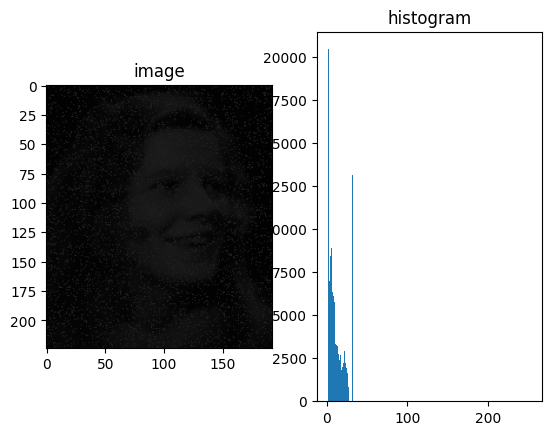

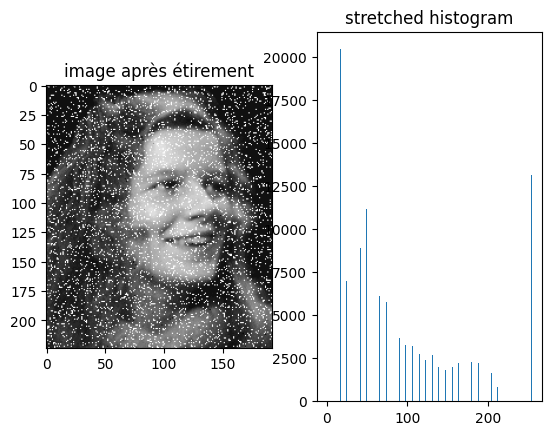

array([[[ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 16,  16,  16],
        [255, 255, 255],
        [ 16,  16,  16],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [255, 255, 255],
        ...,
        [ 16,  16,  16],
        [255, 255, 255],
        [ 16,  16,  16]],

       ...,

       [[ 49,  49,  49],
        [ 32,  32,  32],
        [ 32,  32,  32],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49]],

       [[ 32,  32,  32],
        [ 32,  32,  32],
        [ 24,  24,  24],
        ...,
        [ 49,  49,  49],
        [ 32,  32,  32],
        [ 49,  49,  49]],

       [[ 49,  49,  49],
        [ 24,  24,  24],
        [255, 255, 255],
        ...,
        [ 41,  41,  41],
        [ 49,  49,  49],
        [ 49,  49,  49]]

In [5]:
# Histogramme des niveaux de gris d'images et transformations 3)4) Etirement


def etirement(img):
    # algorithme d'etirement
    maximum = img.max()
    minimum = img.min()
    temp = ((img - minimum) / (maximum - minimum)) * 255

    # on change les floats en int pour afficher l'image
    imgEtiree = np.int_(temp)

    # premier terrain position 1
    plt.subplot(1, 2, 1)
    plt.imshow(
        imgEtiree,
        cmap="gray",
    )
    plt.title('image après étirement')

    # deuxieme terrain position 2
    plt.subplot(1, 2, 2)
    # chargement histogramme
    plt.hist(imgEtiree.ravel(), 256, [0, 255])
    plt.title('stretched histogram')

    plt.show()

    return imgEtiree


# chargement de l'image test
img = cv2.imread('../../Images/histo_imageTest_entree.png',1)
calcul(img)
etirement(img)


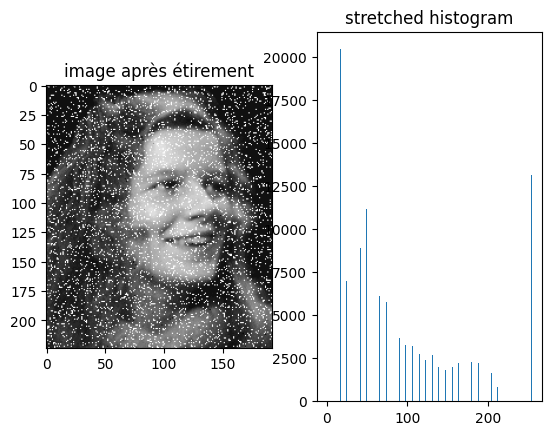

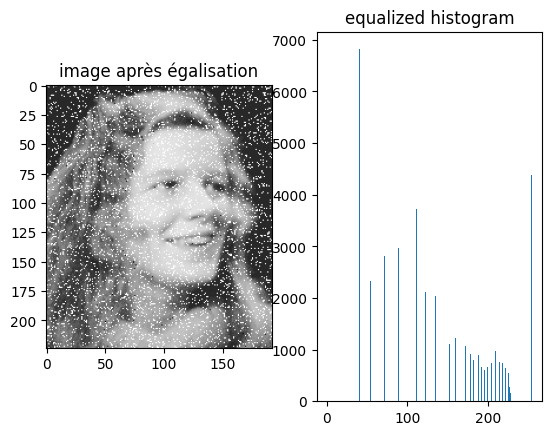

array([[ 40,  40,  40, ...,  40,  40,  40],
       [ 40, 255,  40, ...,  40,  40,  40],
       [ 40,  40, 255, ...,  40, 255,  40],
       ...,
       [111,  71,  71, ..., 111, 111, 111],
       [ 71,  71,  54, ..., 111,  71, 111],
       [111,  54, 255, ...,  89, 111, 111]], dtype=uint8)

In [8]:
# Histogramme des niveaux de gris d'images et transformations 5)6) Etirement

def egalisation(img):
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    
    # algorithme d'egalisation
    imgEgalisee = cv2.equalizeHist(gray.astype(np.uint8))
    # premier terrain position 1
    plt.subplot(1, 2, 1)
    plt.imshow(
        imgEgalisee,
        cmap="gray",
    )
    plt.title('image après égalisation')

    # deuxieme terrain position 2
    plt.subplot(1, 2, 2)
    # chargement histogramme
    plt.hist(imgEgalisee.ravel(), 256, [0, 255])
    plt.title('equalized histogram')

    plt.show()

    return imgEgalisee

# chargement de l'image test
img = cv2.imread('../../Images/histo_imageTest_entree.png')

imgEtiree = etirement(img)
egalisation(imgEtiree)

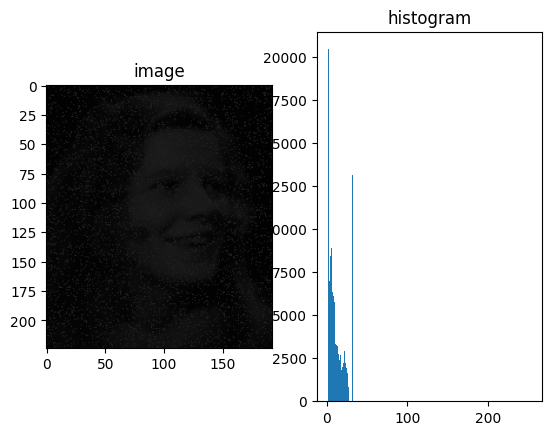

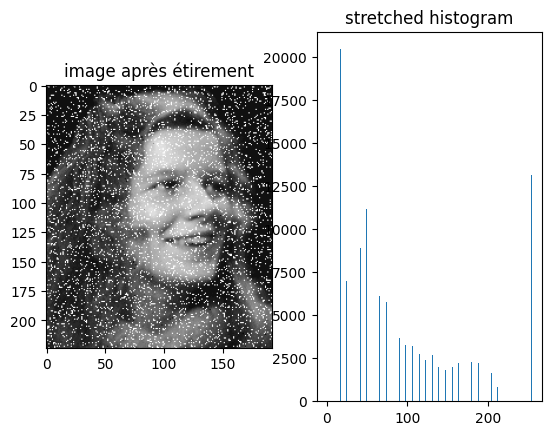

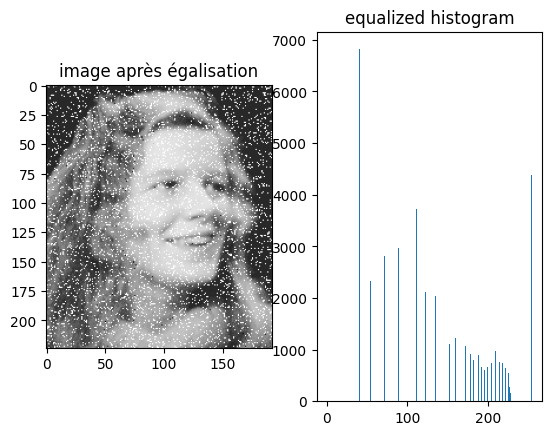

In [9]:
# final AIIP 2 + 3
# chargement de l'image test
imgfinale = cv2.imread('../../Images/histo_imageTest_entree.png')

calcul(imgfinale)
imgfinaleEtiree = etirement(imgfinale)
result = egalisation(imgfinaleEtiree)